In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import datetime
import torchvision
from torchvision.datasets import MNIST
from google.colab import drive
import copy
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
class Model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                              #  nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.ReLU(), 
                               nn.Flatten(),    
                               nn.Linear(784, 400),
                              #  nn.Linear(196, 100),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    # print(type(self.datasets.train_data))
  def forward(self, x):
    return nn.Softmax(dim=1)(self.model(x))


In [ ]:
class Model2(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.Conv2d(4, 2, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(392, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



In [ ]:
class Model3(Model1):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(nn.Conv2d(1, 8, (3,3), stride = 1, padding = 'same'),    #28x28x8
                               nn.Conv2d(8, 8, (3, 3), stride = 1, padding = 'same'),   #28x28x8
                               nn.Conv2d(8, 8, (3,3), stride = 1, padding='same'),
                               nn.MaxPool2d((3, 3), stride = 2, padding = 1),      #15x15x8
                               nn.Conv2d(8, 4, (3,3), stride = 1, padding = 'same'), #15x15x6
                              #  nn.Conv2d(4, 4, (1, 1), stride = 1, padding = 'same' ),  #15x15x4
                               nn.ReLU(), 
                               nn.Flatten(),    #
                               nn.Linear(784, 400),
                               nn.Linear(400, 100),
                               nn.Linear(100, 10))
    self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
    self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))



In [ ]:
class Model4(Model1):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Conv2d(1, 32, (3,3), stride = 1, padding = 'same'),    #28x28x32
                                nn.Conv2d(32, 64, (5,5), stride = 1, padding = 'same'),   #28x28x64
                                nn.ReLU(), 
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding='same'),     #28x28x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #14x14x64
                                nn.Conv2d(64, 64, (5,5), stride = 1, padding = 'same'),   #14x14x64
                                nn.MaxPool2d((2, 2), stride = 2),                         #7x7x64
                                nn.ReLU(), 
                                nn.Flatten(),                                             #3136
                                nn.Linear(3136, 400),
                                nn.Linear(400, 100),
                                nn.Linear(100, 10))
        self.train_data = MNIST('data', train = True, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        self.test_data = MNIST('data', train = False, download=True, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    
    def forward(self, x):
        x = x.to(self.device)
        print(x.device)
        return nn.Softmax(dim=1)(self.model(x.to(self.device)))

In [ ]:
def model_state_dict(path):
  from collections import OrderedDict
  new_state_dict = OrderedDict()
  state_dict = torch.load(path, map_location=device)
  for k, v in state_dict.items():
      # print(k)
      # print(v)
      name = 'model.' + k  # add `model.`
      # print(name)
      new_state_dict[name] = v
  return new_state_dict

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


In [ ]:
class Adv():
  def __init__(self, model_dict):
    super().__init__()
    self.model = {}
    self.loss_fn = nn.CrossEntropyLoss()
    
    for key, value in model_dict.items():
      # print(key)
      self.model[key] = value[0]
      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      # self.model[key].load_state_dict(copy.deepcopy(torch.load(value[2], device)))
      self.model[key].load_state_dict(value[1])
      # print(key,  value[1])
      # print(key, self.model[key].model.device)
      # self.model[key].to(device)
      self.model[key].eval()
    # print(self.model)

  def pred(self, x, y):
    loss = 0
    ypred = {}
    for key, value in self.model.items():
    #   print(key, value.model)
      output = value.model(x)
      loss += self.loss_fn(output, y)
      _, ypred[key] = torch.max(value.model(x), 1)
    # for key, value in ypred.items():
    # #   loss += self.loss_fn(y, ypred[key]) 
    #     loss += self.loss_fn(y, )
    return ypred, loss

  def linbp_relu(self, x):
    x_p = F.relu(-x)
    x = x + x_p.data
    return x

  def model_fwd(self, model, x, linbp, linbp_layer):
    # x = model[0](x)
    for idx in range(len(list(model))):
        if linbp and isinstance(model[idx], nn.ReLU) and idx >= linbp_layer:
            x = self.linbp_relu(x)
        else:
            x = model[idx](x)
    x = x.view(x.size(0), -1)
    # x = model[1].classifier(x)
    return x

In [ ]:
Path1 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_1/2022-04-06 21:21/epoch_20.pth"
Path2 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_2/2022-04-06 21:37/epoch_20.pth"
Path3 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_3/2022-04-07 06:38/epoch_20.pth"

In [ ]:
model1 = Model1().to(device)
state_dict1 = model_state_dict(Path1) 

model2 = Model2().to(device)
state_dict2 = model_state_dict(Path2) 

model3 = Model3().to(device)
state_dict3 = model_state_dict(Path3)

model_dict = {'model1': (model1, state_dict1, Path1), 'model2': (model2, state_dict2, Path2), 'model3': (model3, state_dict3, Path3) }
# model_dict = {'model1': (model1, state_dict1), 'model2': (model2, state_dict2)}
# print(model_dict['model1'][1])
adv = Adv(model_dict)

## Trying an attack

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=True)

In [ ]:
# for idx, data in enumerate(train_dl):
#   ori_img = data[0]
#   label = data[1]

ori_img, label = next(iter(train_dl))

In [ ]:
img = ori_img.clone()
img_x = img
## enabling the gradients before the forward pass
img_x.requires_grad_(True)

output = adv.model_fwd(adv.model['model1'].model, img_x, True, 2)
print('Output from custom forward: ', output)

output_ori = adv.model['model1'].model(ori_img)
print('Output from original forward: ', output_ori)

Output from custom forward:  tensor([[  1.4330,   2.6350,   8.9024,   4.0983,  -6.2603,  -0.1581,   7.7818,
         -10.8947,   0.7257,  -6.6532]], grad_fn=<ViewBackward0>)
Output from original forward:  tensor([[  1.4330,   2.6350,   8.9024,   4.0983,  -6.2603,  -0.1581,   7.7818,
         -10.8947,   0.7257,  -6.6532]], grad_fn=<AddmmBackward0>)


In [ ]:
# target_attack = True
target_attack = False 
model = adv.model['model1'].model
epsilon = 0.1

In [ ]:
# loss.backward(retain_graph=True)
m = 0
iters = 1000
for i in range(iters):
    loss = 0
    for key in adv.model.keys():
        output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
        # print(output.device, label.device)
        loss += nn.CrossEntropyLoss()(output.to(device), label.to(device))
    model.zero_grad()
    loss.backward()
    g = img_x.grad.data
    input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
    m = input_grad
    if target_attack:
        input_grad = -input_grad
    img = img.data + torch.sign(input_grad)
    img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
    img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
    img = torch.clamp(img, min=0, max=1)


attacked image


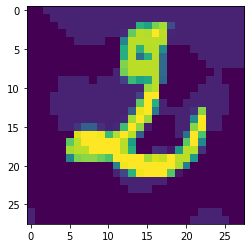

original image


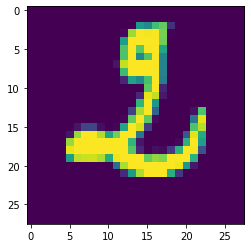

In [ ]:
import matplotlib.pyplot as plt
print("attacked image")
plt.imshow(torch.squeeze(img.detach()).numpy())
plt.show()
print("original image")
plt.imshow(torch.squeeze(ori_img.detach()).numpy())
plt.show()

In [ ]:
torch.max(img-ori_img)

tensor(0.1000)

In [ ]:
pred, loss = adv.pred(img, label)
print(pred)
print(label)
print(loss)

{'model1': tensor([5]), 'model2': tensor([5])}
tensor([9])
tensor(5.4961, grad_fn=<AddBackward0>)


In [ ]:
pred, loss = adv.pred(ori_img, label)
print(pred)
print(label)
print(loss)

{'model1': tensor([9]), 'model2': tensor([9])}
tensor([9])
tensor(0.1823, grad_fn=<AddBackward0>)


# Success Rate vs Epsilon

In [ ]:
Path4 = "/content/drive/MyDrive/CS726 Project/CS726_project/MNIST_ENSEMBLE_MODEL_4/2022-04-09 10:09/epoch_20.pth"
target_model = Model4().to(device)
state_dict = model_state_dict(Path4)
target_model.load_state_dict(state_dict)

<All keys matched successfully>

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)

success_rates = []
for epsilon in [0.01*i for i in range(10)]:
    success = 0
    for i in range(100):
        ori_img, label = next(iter(train_dl))
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 100
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0


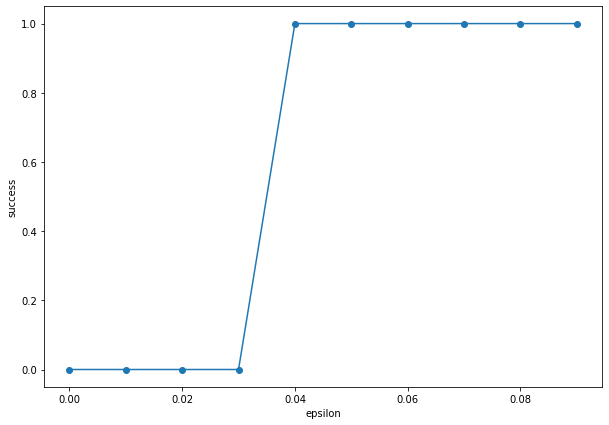

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0.01*i for i in range(10)], success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### FULL (LinBP + MI-FGSM + Ensemble)

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)

success_rates = []
for epsilon in [0.01*i for i in range(10)]:
    success = 0
    for i in range(100):
        ori_img, label = next(iter(train_dl))
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone().to(device)
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 1000
        for i in range(iters):
            loss = 0
            for key in adv.model.keys():
                output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
                loss += nn.CrossEntropyLoss()(output, label.to(device))
                adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

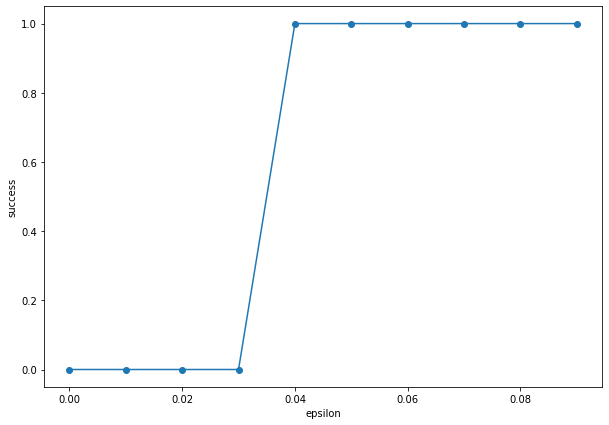

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0.01*i for i in range(10)], success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()

### LinBP + MI-FGSM

In [ ]:
train_dl = DataLoader(model1.train_data, batch_size = 1, shuffle=False)

success_rates = []
for epsilon in [0.01*i for i in range(10)]:
    success = 0
    for i in range(100):
        ori_img, label = next(iter(train_dl))
        ori_img = ori_img.to(device)
        label = label.to(device)
        img = ori_img.clone()
        img_x = img
        ## enabling the gradients before the forward pass
        img_x.requires_grad_(True)

        m = 0
        iters = 1000
        for i in range(iters):
            loss = 0
            # for key in adv.model.keys():
            key='model1'
            output = adv.model_fwd(adv.model[key].model, img_x, True, 2)
            loss += nn.CrossEntropyLoss()(output, label.to(device))
            adv.model[key].model.zero_grad()
            loss.backward()
            g = img_x.grad.data
            input_grad = 1 * m + g / torch.norm(g, dim=(1, 2, 3), p=1, keepdim=True)
            m = input_grad
            img = img.data + torch.sign(input_grad)
            img = torch.where(img > ori_img + epsilon, ori_img + epsilon, img)
            img = torch.where(img < ori_img - epsilon, ori_img - epsilon, img)
            img = torch.clamp(img, min=0, max=1)
        
        with torch.no_grad():
            _, ypred = torch.max(target_model(img), 1)
        if ypred!=label:
            success+=1
    
    success_rates.append(success/100)

cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

In [ ]:
success_rates

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

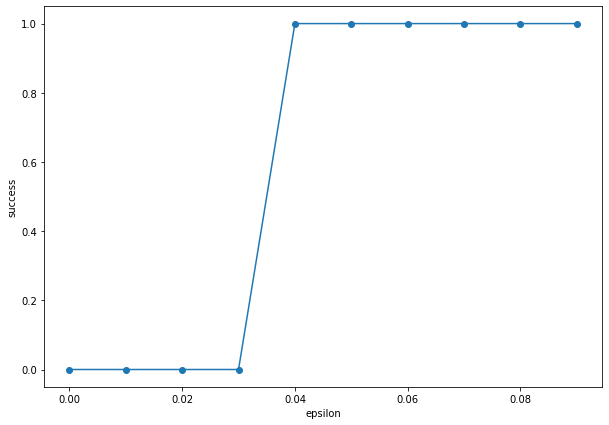

In [ ]:
plt.figure(figsize=(10,7))
plt.plot([0.01*i for i in range(10)], success_rates, marker='o')
plt.xlabel('epsilon')
plt.ylabel('success')
plt.show()